In [114]:
%run datasets.py

# create object
data = datasets()
# create batch loader
'''
batch_size - size of single batch
img_size   - img scaling
data_aug   - turn on random crop and flips
dataset    - pick dataset
train_size - size of train dataset
valid_size - size of validation dataset
'''
#example - load mnist dataset
batch_loader = data.create_dataset(batch_size=10, img_size=224, data_aug=True)
for a, b in (batch_loader['train']):
    # a - batch_size x channels x img_size x img_size - data
    # b - batch_size - labels
    print(a.shape, b.shape)
    break


torch.Size([10, 1, 224, 224]) torch.Size([10])


<Figure size 432x288 with 0 Axes>

In [111]:
import plotter
%pylab inline

Populating the interactive namespace from numpy and matplotlib


label :  [3 2 9 0 7 7 7 0 6 7]


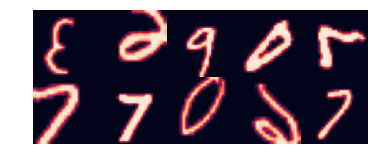

In [113]:
#plot example from dataset
for a, b in (batch_loader['train']):
    plotter.plot_mat(a.numpy())
    print("label : " ,b.numpy())
    break